In [1]:
# Initial imports
import nltk
import pandas as pd
from path import Path
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\antho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Elon Musk Bitcoin Tweet Sentiment Analysis

elonmusk_sentiment_analysis = Path("../Twitter_API/Twitter_API/Results/elon_musk_sentiment_analysis.csv")
elonmusk_sentiment_analysis = pd.read_csv(elonmusk_sentiment_analysis, encoding="utf-8-sig")
elonmusk_sentiment_analysis = elonmusk_sentiment_analysis.drop(columns=['Unnamed: 0','index','conversation_id','id','created_at','user_id'])
elonmusk_sentiment_analysis = elonmusk_sentiment_analysis.rename(columns={'text_compound': 'elonmusk_bitcoin_text_compound'})
elonmusk_sentiment_analysis = elonmusk_sentiment_analysis.set_index('date')
elonmusk_sentiment_analysis

,username,name,tweet,elonmusk_bitcoin_text_compound,text_pos,text_neu,text_neg,text_sent
date,,,,,,,,
2021-11-20,elonmusk,Elon Musk,WSBChairman Bitcoin cures cancer,-0.6597,0.000,0.405,0.595,-1
2021-10-24,elonmusk,Elon Musk,Filasophical ShibaInuHodler Out curiosity I ac...,0.6369,0.133,0.867,0.000,1
2021-10-24,elonmusk,Elon Musk,itsALLrisky TeslaGong mishaboar DogecoinFdn Po...,-0.0697,0.149,0.693,0.158,-1
2021-07-29,elonmusk,Elon Musk,heydave We dont many Bitcoin but its close,0.0000,0.000,1.000,0.000,0
2021-07-19,elonmusk,Elon Musk,jack BitcoinMagazine CathieDWood Sure I ton,0.3182,0.365,0.635,0.000,1
2021-07-19,elonmusk,Elon Musk,BitcoinMagazine jack CathieDWood During talk s...,0.0000,0.000,1.000,0.000,0
2021-06-25,elonmusk,Elon Musk,Thats not funny Bitcoin maxis,-0.3412,0.000,0.624,0.376,-1
2021-06-25,elonmusk,Elon Musk,How many Bitcoin maxis take screw lightbulb,-0.1027,0.000,0.811,0.189,-1
2021-06-25,elonmusk,Elon Musk,jack Oh right Bitcoin haha,0.4588,0.429,0.571,0.000,1


In [3]:
# General Population Ethereum Sentiment Analysis

generalpop_ethereum_sentiment_analysis_bigdataset = Path("../Twitter_API/Twitter_API/Results/generalpop_ethereum_sentiment_analysis_bigdataset.csv")
generalpop_ethereum_sentiment_analysis_bigdataset = pd.read_csv(generalpop_ethereum_sentiment_analysis_bigdataset, encoding="utf-8-sig")
generalpop_ethereum_sentiment_analysis_bigdataset = generalpop_ethereum_sentiment_analysis_bigdataset.drop(columns=['Unnamed: 0'])
generalpop_ethereum_sentiment_analysis_bigdataset = generalpop_ethereum_sentiment_analysis_bigdataset.rename(columns={'text_compound': 'generalpop_ETH_text_compound'})
generalpop_ethereum_sentiment_analysis_bigdataset = generalpop_ethereum_sentiment_analysis_bigdataset.set_index('date')
generalpop_ethereum_sentiment_analysis_bigdataset

,user_name,user_description,user_created,user_followers,user_friends,user_favourites,text,generalpop_ETH_text_compound,text_pos,text_neu,text_neg,text_sent
date,,,,,,,,,,,,
2021-11-15 07:26:39+00:00,#1 Crypto Currency TRADING,"Profit thought trading, Learn , Trade & Earn💲....",2021-11-10 10:42:01+00:00,4,0,0,Get upto 1000 that’s 10x with our premium spot...,0.0000,0.000,1.000,0.0,0
2021-11-15 07:26:35+00:00,Reyrey,Artist | NFT Broker & Collector for AnideaNFT ...,2011-03-07 07:22:57+00:00,343,650,589,"Adopted a Hypocat #053, “Crazy Rich Cat” 🤑💵💵💵🤩...",0.5983,0.145,0.855,0.0,1
2021-11-15 07:26:32+00:00,akter jahan,NaN,2021-10-28 13:28:05+00:00,1,2,0,Top 10 Coins by Social Engagement over the las...,0.6239,0.145,0.855,0.0,1
2021-11-15 07:26:30+00:00,riyan,i always paricipated your project,2021-09-16 16:59:11+00:00,11,127,99,Requesting faucet funds into 0x5278942b39deD8c...,0.0000,0.000,1.000,0.0,0
2021-11-15 07:26:30+00:00,Michelle Eriksen,"Art Creator, NFT, Crypto",2021-08-11 06:40:08+00:00,522,1428,16,New Listing BTS 0.008ETH !! \n#NFTs #nftcolle...,0.0000,0.000,1.000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-14 13:43:00+00:00,DAIANA LAZZARIN,#NFTartist #NFTcollector\nhttps://t.co/labmD20...,2020-03-28 23:42:49+00:00,1539,729,4403,Pepe the gunman II\n\nhttps://t.co/xTOJSvLwX9 ...,0.0000,0.000,1.000,0.0,0
2021-11-14 13:42:56+00:00,frieslips.nft,"Mr. Fries has the ability to be anyone, but we...",2021-01-23 07:40:12+00:00,74,190,95,@missteennfts 🔥 TOODLER 1:1 EDITION 🔥\nPlease ...,0.3182,0.084,0.916,0.0,1
2021-11-14 13:42:42+00:00,dave.,I draw something i into | NFT Artist ID 🇮🇩,2021-10-29 08:47:51+00:00,61,199,145,Hello guys! mind to view my project at opensea...,0.7170,0.150,0.850,0.0,1


In [4]:
# General Population DOGECOIN Tweet Sentiment Analysis

generalpop_DOGE_sentiment_analysis_bigdataset = Path("../Twitter_API/Twitter_API/Results/generalpop_DOGE_sentiment_analysis_bigdataset.csv")
generalpop_DOGE_sentiment_analysis_bigdataset = pd.read_csv(generalpop_DOGE_sentiment_analysis_bigdataset, encoding="utf-8-sig")
generalpop_DOGE_sentiment_analysis_bigdataset = generalpop_DOGE_sentiment_analysis_bigdataset.drop(columns=['language','hashtags','Unnamed: 0'])
generalpop_DOGE_sentiment_analysis_bigdataset = generalpop_DOGE_sentiment_analysis_bigdataset.rename(columns={'text_compound': 'generalpop_DOGE_text_compound'})
generalpop_DOGE_sentiment_analysis_bigdataset = generalpop_DOGE_sentiment_analysis_bigdataset.set_index('date')
generalpop_DOGE_sentiment_analysis_bigdataset

,time,timezone,username,name,tweet,generalpop_DOGE_text_compound,text_pos,text_neu,text_neg,text_sent
date,,,,,,,,,,
20-04-2021,17:57:09,530,sunnyepposo,congrats,I invested16k couple weeks ago large trading g...,0.0000,0.000,1.000,0.000,0
20-04-2021,17:57:07,530,pickndng,andrea || busy sa exams at pts kuno,Bought16k My dogecoin make millionaire Especia...,-0.4019,0.000,0.881,0.119,-1
20-04-2021,17:57:07,530,s4y4n9_semu4,#SayangiSemesta,I invested16k couple weeks ago large trading g...,0.0000,0.000,1.000,0.000,0
20-04-2021,17:57:06,530,dogecoinsky,dogecoinsky,looking back 211 BTC low value high distrust h...,0.5023,0.149,0.760,0.090,1
20-04-2021,17:57:04,530,dogeman0401,jay,Looks like hype today isnt coming fruition dog...,0.3612,0.200,0.800,0.000,1
...,...,...,...,...,...,...,...,...,...,...
16-04-2021,06:01:13,530,rwied44,OutToLunch,dogecoin reaches 020 httpstcoyBkUBC3xRI,0.0516,0.286,0.714,0.000,1
16-04-2021,06:01:12,530,rtx933,rtx933,dogecoin LATOKEN httpstcoCiR47MT9Qz,0.0000,0.000,1.000,0.000,0
16-04-2021,06:01:12,530,grababagceo,Brandon Jones,dogecoin community unlike planet Thats were he...,0.0000,0.000,1.000,0.000,0


In [6]:
# Bitcoin Price

bitcoin_price = Path("../crypto_data/BTCUSDT.csv")
bitcoin_price = pd.read_csv(bitcoin_price, encoding="utf-8-sig", header=[1])
bitcoin_price = bitcoin_price.drop(columns=['unix'])
bitcoin_price

,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,10/04/2022 0:00,BTC/USDT,42753.96,42776.62,42653.68,42653.69,547.32868,23374135.52,23134.0
1,9/04/2022 23:00,BTC/USDT,42543.42,42800.00,42488.23,42753.97,1075.30723,45889601.98,30337.0
2,9/04/2022 22:00,BTC/USDT,42558.06,42634.88,42501.31,42543.42,439.09087,18693342.59,18922.0
3,9/04/2022 21:00,BTC/USDT,42423.18,42584.49,42390.00,42558.06,425.13616,18063585.63,19529.0
4,9/04/2022 20:00,BTC/USDT,42511.95,42638.00,42423.18,42423.18,419.45489,17846424.65,21083.0
...,...,...,...,...,...,...,...,...,...
40699,17/08/2017 8:00,BTC/USDT,4349.99,4377.85,4333.32,4360.69,0.94990,4139.70,NaN
40700,17/08/2017 7:00,BTC/USDT,4324.35,4349.99,4287.41,4349.99,4.44000,19241.06,NaN
40701,17/08/2017 6:00,BTC/USDT,4315.32,4345.45,4309.37,4324.35,7.23000,31282.31,NaN
40702,17/08/2017 5:00,BTC/USDT,4308.83,4328.69,4291.37,4315.32,23.23000,100304.82,NaN


In [7]:
# Google trends Data

googletrends_data = Path("../Google Trends/googletrends_data_results_v2.csv")
googletrends_data = pd.read_csv(googletrends_data, encoding="utf-8-sig")
googletrends_data = googletrends_data.rename(columns={'Unnamed: 0': 'date'})
googletrends_data = googletrends_data.drop(columns=['bitcoin_Close_x','ethereum_Close_x','tether_Close_x','bitcoin_Close_y','ethereum_Close_y',
                                                    'tether_Close_y', 'dogecoin_Close_x','dogecoin_Close_x']).rename(columns={'dogecoin_Close_y': 'dogecoin_Close'})
googletrends_data = googletrends_data.set_index('date')
googletrends_data

,bitcoin,ethereum,tether,dogecoin,usd coin,bitcoin_Close,ethereum_Close,tether_Close,dogecoin_Close
date,,,,,,,,,
2017-11-09,10.0,13.0,29.0,0.0,12.0,7143.580078,320.884003,1.008180,0.001415
2017-11-10,13.0,11.0,22.0,0.0,19.0,6618.140137,299.252991,1.006010,0.001163
2017-11-11,12.0,10.0,24.0,0.0,8.0,6357.600098,314.681000,1.008990,0.001201
2017-11-12,15.0,10.0,26.0,0.0,13.0,5950.069824,307.907990,1.012470,0.001038
2017-11-13,12.0,10.0,20.0,0.0,13.0,6559.490234,316.716003,1.009350,0.001211
...,...,...,...,...,...,...,...,...,...
2021-11-18,12.0,35.0,25.0,1.0,20.0,56942.136719,4000.650879,0.999970,0.221383
2021-11-19,11.0,32.0,29.0,1.0,15.0,58119.578125,4298.306641,1.000820,0.233110
2021-11-20,10.0,28.0,28.0,1.0,19.0,59697.195312,4409.931152,1.000362,0.233024


In [8]:
googletrends_data.corr().style.background_gradient()

,bitcoin,ethereum,tether,dogecoin,usd coin,bitcoin_Close,ethereum_Close,tether_Close,dogecoin_Close
bitcoin,1.000000,0.681792,0.559934,0.263496,0.684247,0.401314,0.330643,0.178717,0.238270
ethereum,0.681792,1.000000,0.535095,0.544466,0.666441,0.772555,0.773080,0.000054,0.751746
tether,0.559934,0.535095,1.000000,0.253205,0.519260,0.266807,0.321698,-0.020157,0.279193
dogecoin,0.263496,0.544466,0.253205,1.000000,0.327698,0.401836,0.351935,-0.035318,0.482189
usd coin,0.684247,0.666441,0.519260,0.327698,1.000000,0.382160,0.427359,0.151667,0.350247
bitcoin_Close,0.401314,0.772555,0.266807,0.401836,0.382160,1.000000,0.919090,-0.124358,0.774942
ethereum_Close,0.330643,0.773080,0.321698,0.351935,0.427359,0.919090,1.000000,-0.119739,0.884136
tether_Close,0.178717,0.000054,-0.020157,-0.035318,0.151667,-0.124358,-0.119739,1.000000,-0.104792
dogecoin_Close,0.238270,0.751746,0.279193,0.482189,0.350247,0.774942,0.884136,-0.104792,1.000000


In [9]:
""" LOGISTIC REGRESSION """ 

import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array(googletrends_data['bitcoin']).reshape((-1,1))
y = np.array(googletrends_data['bitcoin_Close'])
print(X)
print(y)

In [10]:
model = LinearRegression().fit(X, y)

In [11]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.16105275900777805
intercept: 10878.292702762596
slope: [778.90696546]


Text(0.5, 0, 'Bitcoin Close Price Data')

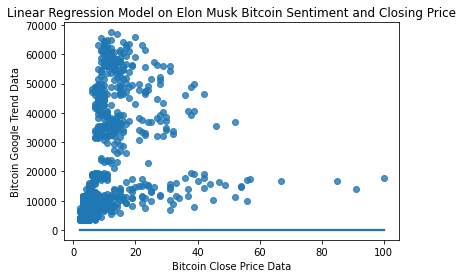

In [13]:
import seaborn as sns
plt.rcParams.update({'font.size': 10})

sns.regplot(x=X, y=y, data=r_sq, logistic=True, ci=None).set(title="Linear Regression Model on Elon Musk Bitcoin Sentiment and Closing Price")
plt.ylabel('Bitcoin Google Trend Data')
plt.xlabel('Bitcoin Close Price Data')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

In [14]:
new_model = LinearRegression().fit(X, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)

intercept: [10878.29270276]
slope: [[778.90696546]]


In [15]:
y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

predicted response:
[18667.36235735 21004.08325373 20225.17628827 ... 18667.36235735
 17888.45539189 18667.36235735]


In [17]:
LSTM_data = googletrends_data[['bitcoin','bitcoin_Close']].copy()
LSTM_data

,bitcoin,bitcoin_Close
date,,
2017-11-09,10.0,7143.580078
2017-11-10,13.0,6618.140137
2017-11-11,12.0,6357.600098
2017-11-12,15.0,5950.069824
2017-11-13,12.0,6559.490234
...,...,...
2021-11-18,12.0,56942.136719
2021-11-19,11.0,58119.578125
2021-11-20,10.0,59697.195312


In [18]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(LSTM_data, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(LSTM_data) - window - 1):
        features = LSTM_data.iloc[i:(i + window), feature_col_number]
        target = LSTM_data.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [19]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 1
target_column = 1
X, y = window_data(LSTM_data, window_size, feature_column, target_column)

In [20]:
# Use 70% of the data for training and the remaineder for testing
# YOUR CODE HERE!

seventypercent = int(.7 * len(X))

X_train = X[: seventypercent - 1]
y_train = y[: seventypercent - 1]

X_test = X[seventypercent:]
y_test = y[seventypercent:]

In [21]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
# YOUR CODE HERE!

scaler = MinMaxScaler()
scaler.fit(X_train)
print(scaler.fit(X_train))

MinMaxScaler()


In [22]:
""" Transform the train and test data """


scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scaler.fit(y_train)

y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [19]:
# Reshape the features for the model
# YOUR CODE HERE!
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
""" MULTIPLE/LINEAR REGRESSION """

from sklearn.linear_model import LinearRegression

y = googletrends_data['bitcoin_Close']
X = googletrends_data['bitcoin']


# Create the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

In [ ]:
# CONCAT Dataframes for final analysis

combinded_data = pd.concat([generalpop_DOGE_sentiment_analysis_bigdataset,googletrends_data])
combinded_data

In [ ]:
""" MULTIPLE/LINEAR REGRESSION """

from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X_binary_encoded, y)

In [ ]:
# Predicting y using x
predictions = model.predict(X_binary_encoded)

# Evaluating the model

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# R2 score
score = model.score(X_binary_encoded, y)
r2 = r2_score(y, predictions)

# MSE
mse = mean_squared_error(y, predictions)
# RMSE
rmse = np.sqrt(mse)

# Standard deviation of variable
np.std(y)

# Plotting
plt.scatter(X["Week_of_year"], y)
plt.plot(X["Week_of_Year"], predictions, color = "red")